# Instalación de libreria para hacer las peticiones a la API open weather

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.76 ,
	"longitude": -73.99 ,
	"start_date": "2010-01-01",
	"end_date": "2024-03-17",
	"hourly": ["temperature_2m", "precipitation"],
	"timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
"""print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
"""
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation"] = hourly_precipitation

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe.to_csv("hourly_data.csv", index=False)

temperature_2m: temperatura a dos metros sobre el nivel del suelo. Por horas, en Centígrados.

precipitation: precipitación en milímetros, incluye lluvias y nieve.

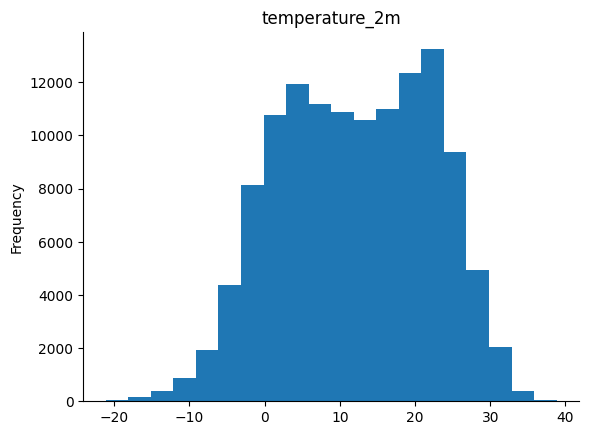

In [ ]:
from matplotlib import pyplot as plt
hourly_dataframe['temperature_2m'].plot(kind='hist', bins=20, title='temperature_2m')
plt.gca().spines[['top', 'right',]].set_visible(False)

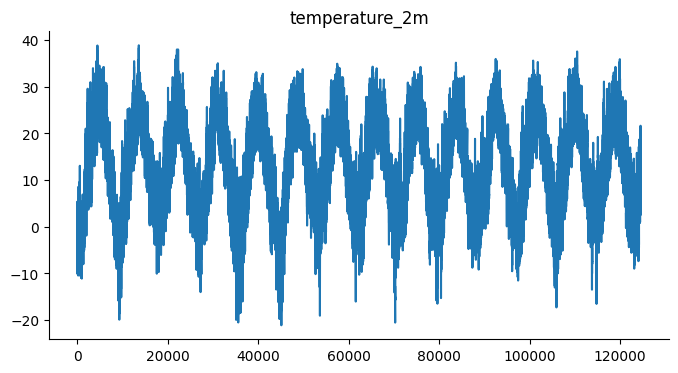

In [ ]:
from matplotlib import pyplot as plt
hourly_dataframe['temperature_2m'].plot(kind='line', figsize=(8, 4), title='temperature_2m')
plt.gca().spines[['top', 'right']].set_visible(False)

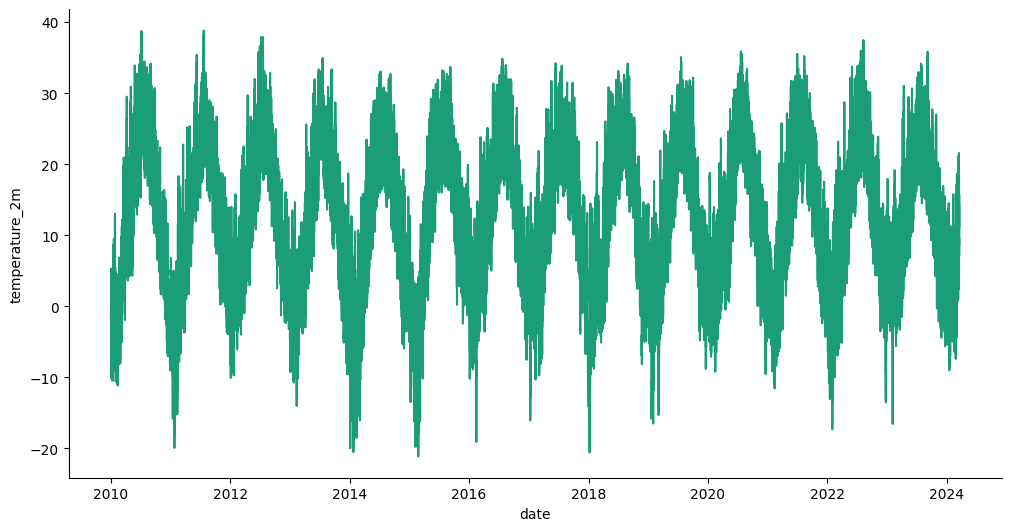

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['temperature_2m']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hourly_dataframe.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('temperature_2m')

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.76 ,
	"longitude": -73.99 ,
	"start_date": "2010-01-01",
	"end_date": "2024-03-17",
	"daily": ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "precipitation_sum"],
	"timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
"""print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")"""

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(2).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["precipitation_sum"] = daily_precipitation_sum

daily_dataframe = pd.DataFrame(data = daily_data)
#daily_dataframe.to_csv('daily_weather_data.csv', index=False)
daily_dataframe

Coordinates 40.738136291503906°N -74.04254150390625°E
Elevation 23.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s


,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum
0,2010-01-01 04:00:00+00:00,5.330500,-4.0695,0.290917,1.8
1,2010-01-02 04:00:00+00:00,-0.869500,-9.3695,-3.546583,0.7
2,2010-01-03 04:00:00+00:00,-4.869500,-10.1195,-7.682001,0.0
3,2010-01-04 04:00:00+00:00,-0.719500,-7.3195,-4.873667,0.0
4,2010-01-05 04:00:00+00:00,-0.119500,-7.3695,-4.648666,0.0
...,...,...,...,...,...
5185,2024-03-13 04:00:00+00:00,15.354500,2.4045,8.685750,0.0
5186,2024-03-14 04:00:00+00:00,21.204500,3.9545,11.587832,0.0
5187,2024-03-15 04:00:00+00:00,21.604500,8.2045,14.891999,0.8
5188,2024-03-16 04:00:00+00:00,14.304501,4.7545,9.273251,0.1


In [ ]:
import statistics as ss
mean_max_temp = ss.mean(daily_dataframe["temperature_2m_max"])
mean_min_temp = ss.mean(daily_dataframe["temperature_2m_min"])

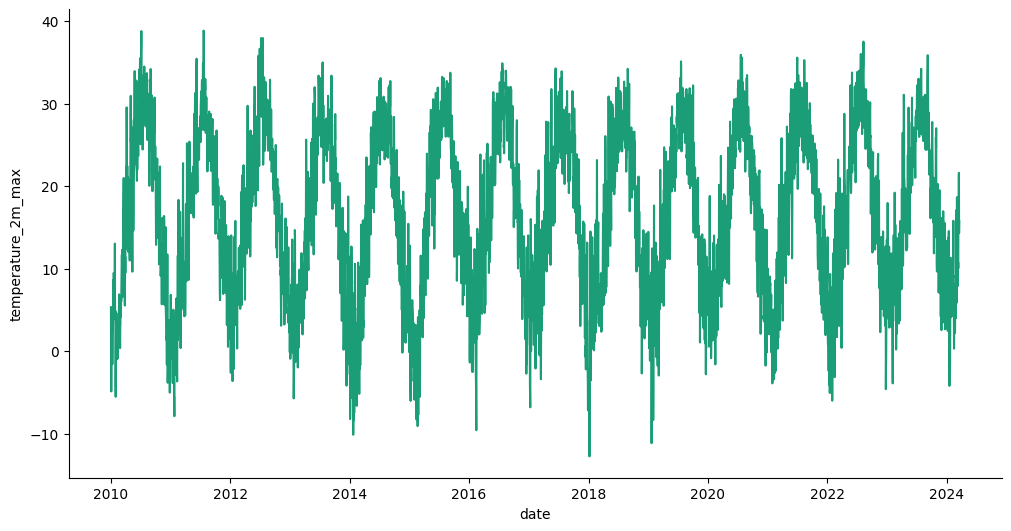

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['temperature_2m_max']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = daily_dataframe.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('temperature_2m_max')

In [ ]:
from matplotlib import pyplot as plt
daily_dataframe['temperature_2m_mean'].plot(kind='hist', bins=20, title='temperature_2m_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
daily_dataframe['precipitation_sum'].plot(kind='hist', bins=20, title='precipitation_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'daily_dataframe' is not defined

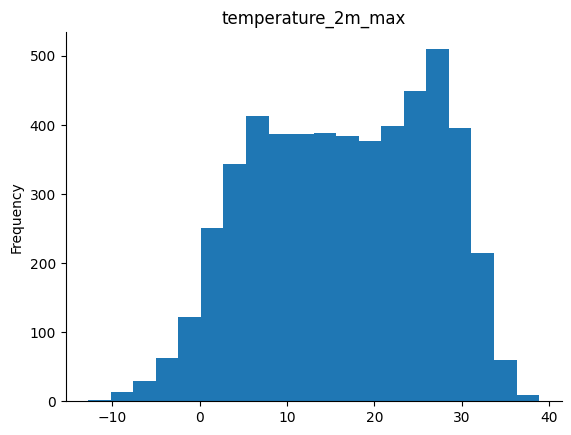

In [ ]:
from matplotlib import pyplot as plt
daily_dataframe['temperature_2m_max'].plot(kind='hist', bins=20, title='temperature_2m_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Define coordinates
coordinates = [
    {"latitude": 40.7140261, "longitude": -74.038052},
    {"latitude": 40.733517, "longitude": -73.991152},
    {"latitude": 40.758655,  "longitude": -73.980389},
    {"latitude": 40.799245, "longitude": -73.953010},
    {"latitude": 40.833705, "longitude": -73.944087}
]

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
start_date = "2024-03-03"
end_date = "2024-03-17"
variables = ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "precipitation_sum"]
timezone = "America/New_York"

for coord in coordinates:
    params = {
        "latitude": coord["latitude"],
        "longitude": coord["longitude"],
        "start_date": start_date,
        "end_date": end_date,
        "daily": variables,
        "timezone": timezone
    }
    responses = openmeteo.weather_api(url, params=params)

    # Process each location
    for response in responses:
        print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process daily data
        daily = response.Daily()
        daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
        daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
        daily_temperature_2m_mean = daily.Variables(2).ValuesAsNumpy()
        daily_precipitation_sum = daily.Variables(3).ValuesAsNumpy()

        daily_data = {"date": pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )}
        daily_data["temperature_2m_max"] = daily_temperature_2m_max
        daily_data["temperature_2m_min"] = daily_temperature_2m_min
        daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
        daily_data["precipitation_sum"] = daily_precipitation_sum

        daily_dataframe = pd.DataFrame(data=daily_data)
        print(daily_dataframe)


Coordinates 40.738136291503906°N -74.04254150390625°E
Elevation 12.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
                        date  temperature_2m_max  temperature_2m_min  \
0  2024-03-03 04:00:00+00:00           18.726000               5.926   
1  2024-03-04 04:00:00+00:00           14.376000               3.726   
2  2024-03-05 04:00:00+00:00            8.426000               3.976   
3  2024-03-06 04:00:00+00:00            9.826000               3.676   
4  2024-03-07 04:00:00+00:00           12.676000               5.876   
5  2024-03-08 04:00:00+00:00           12.426000               0.826   
6  2024-03-09 04:00:00+00:00            7.976000               3.776   
7  2024-03-10 04:00:00+00:00           10.876000               2.226   
8  2024-03-11 04:00:00+00:00           10.126000               1.026   
9  2024-03-12 04:00:00+00:00           17.575998               2.576   
10 2024-03-13 04:00:00+00:00           15.426000           

In [ ]:
!pip install shapely

In [ ]:
# Convertir el archivo geopandas a json
import geopandas as gpd
nyc_data  = gpd.read_file('/content/nyc-borough-boundaries-polygon.geojson')
nyc_data.to_file("nyc_polygons.json", driver="GeoJSON")

In [ ]:
import requests

url = "https://data.cityofnewyork.us/api/views/755u-8jsi/rows.json"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    with open("data.json", "w") as json_file:
        json_file.write(json.dumps(data, indent=4))
    print("JSON data has been saved to 'data.json'")
else:
    print("Failed to fetch data:", response.status_code)


JSON data has been saved to 'data.json'
